In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import datetime
import matplotlib 
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

matplotlib.style.use('ggplot')

pd.set_option('display.max_columns', None)

In [2]:
path = r'C:\Users\michael\Documents\_projects'\
       r'\us_housing_prices\Metro_MedianValuePerSqft_AllHomes.xls'
    
df = pd.read_excel(path, index_col=0)

In [3]:
date_cols = [col for col in df.columns.tolist() 
             if not str(col).isalpha()]

df.State = df.State.str.strip()

df.index = df.index.to_series().replace(
                    {'United States': 'National Average'})

df.index.name = 'Metro Area'

df['Mean']  = df[date_cols].mean(axis=1, numeric_only=True)
df['StDev'] = df[date_cols].std(axis=1, numeric_only=True)

plot_df = df[date_cols]

plot_df.columns = pd.to_datetime(plot_df.columns.to_series(), 
                                 format="%Y-%m")

In [4]:
def plot_house_prices(plot_df, filter_list):
    plot_df_ = plot_df.ix[filter_list]

    ys = plot_df_[max(date_cols)].values
    xs = range(1, len(ys)+1)

    fig, (plot1, plot2) = plt.subplots(1, 2, sharey=True)

    plot1.set(ylabel='Dollars')

    plot_df_.T.boxplot(return_type='axes', rot=90, ax=plot1)

    plot1.scatter(xs, ys, marker='o', c='b')

    plot_df_.T.plot(rot=45, ax=plot2).legend(
        loc='center left', bbox_to_anchor=(1, 0.5))

    plt.suptitle('Median House Price per Square Foot')

    plot1.set_ylim(ymin=0)

    plt.show()
    
    return fig, plot1, plot2

In [5]:
lowest_mean  = df.Mean.sort_values(ascending=True )[:10].index.tolist()
highest_mean = df.Mean.sort_values(ascending=False)[:10].index.tolist()
most_stdev  = df.StDev.sort_values(ascending=False)[:10].index.tolist()

metrics = [lowest_mean, highest_mean, most_stdev]

for metric in metrics:
    metric.append(u'National Average')

+++++++++++++++++++++++++ Lowest Mean Price ++++++++++++++++++++++++++


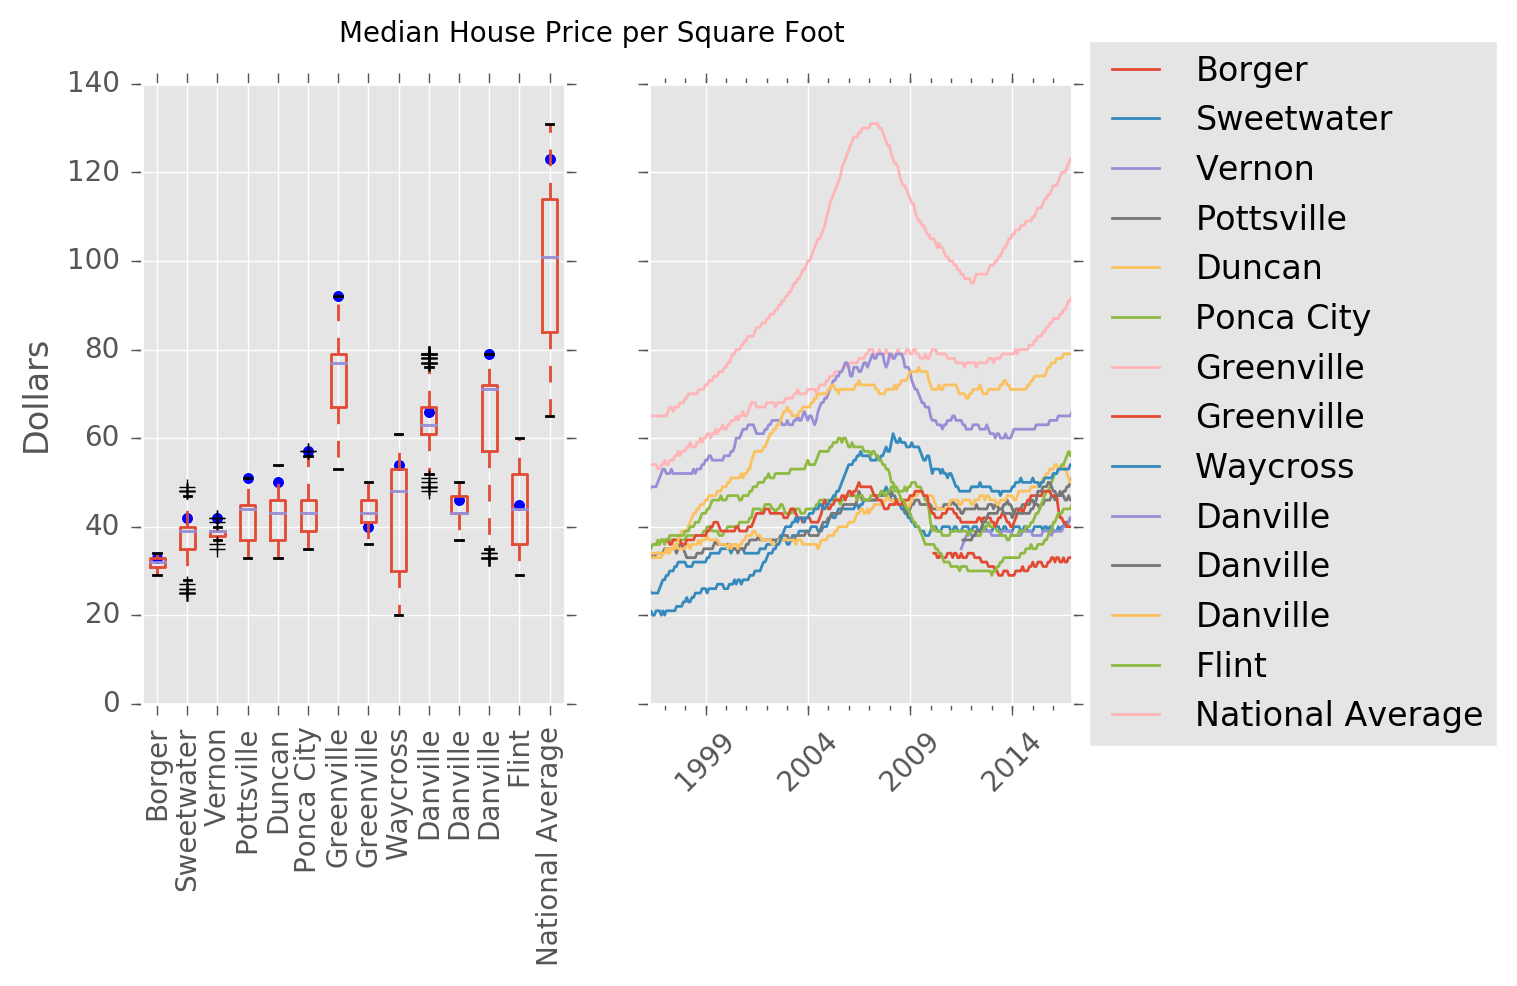

In [6]:
print ' Lowest Mean Price '.center(70, '+')
p = plot_house_prices(plot_df, lowest_mean)

+++++++++++++++++++++++++ Highest Mean Price +++++++++++++++++++++++++


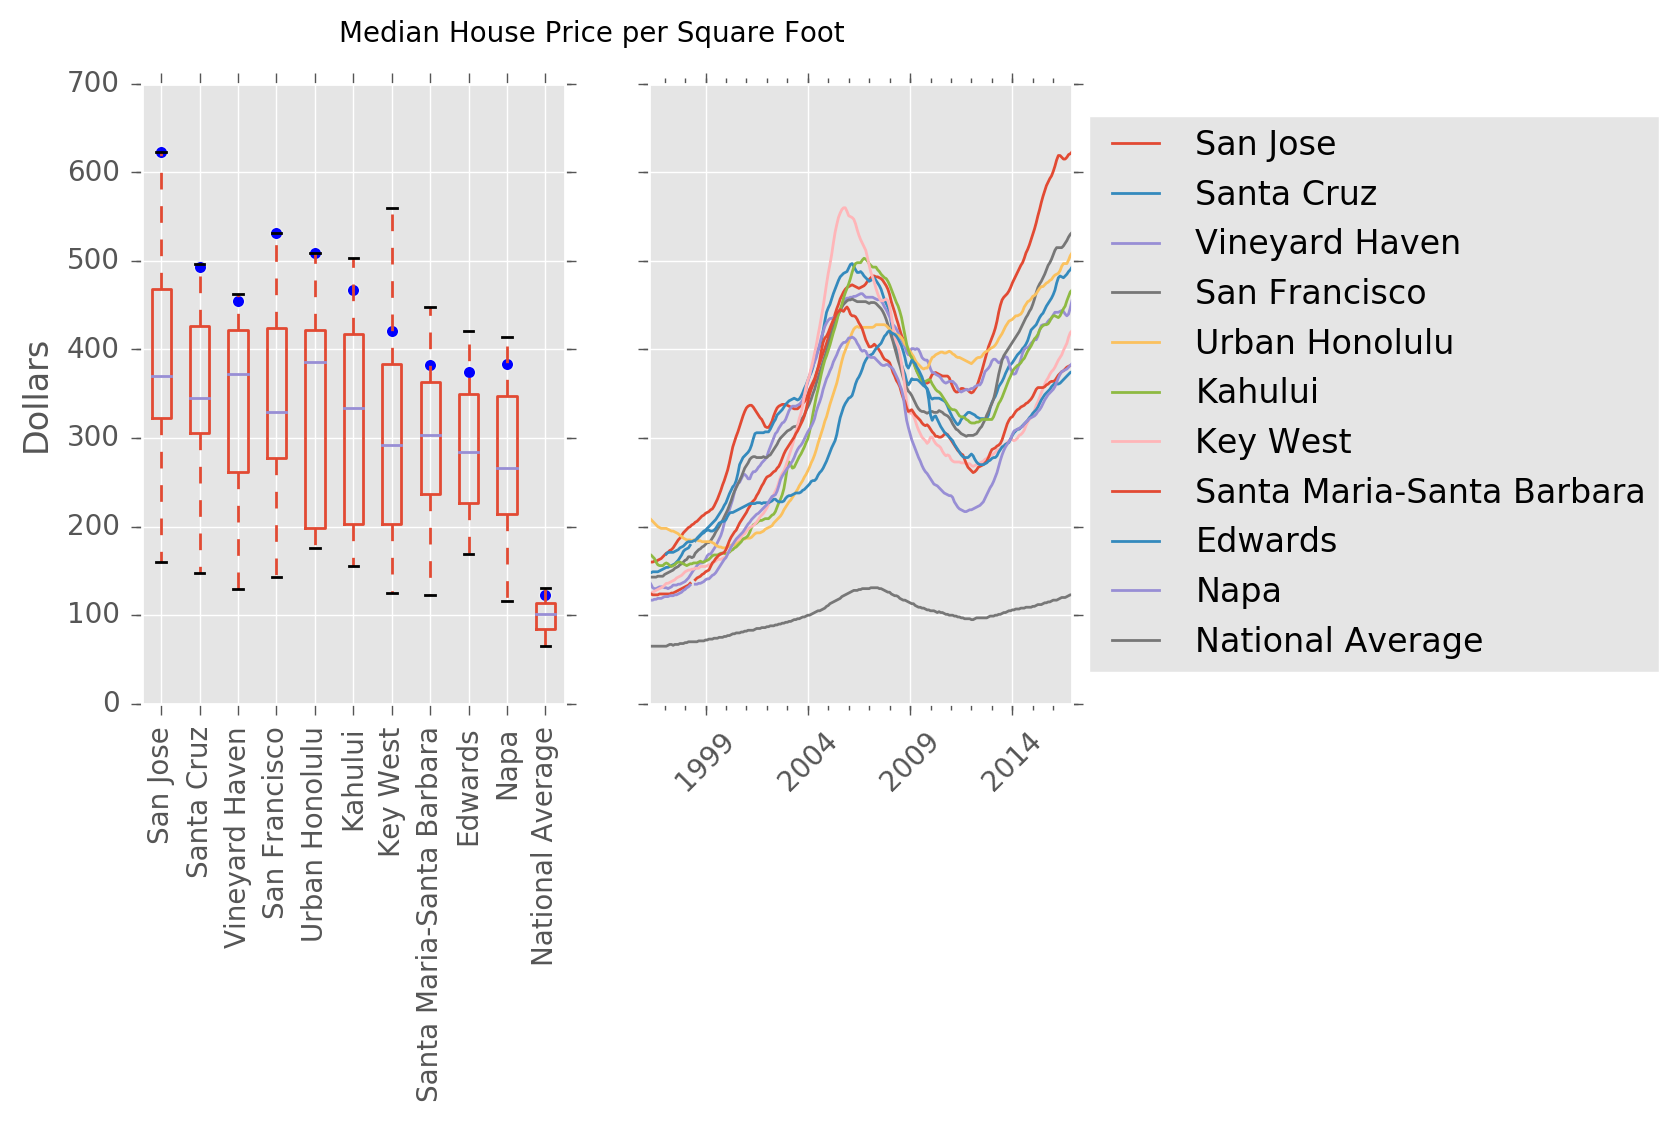

In [7]:
print ' Highest Mean Price '.center(70, '+')
p = plot_house_prices(plot_df, highest_mean)

++++++++++++++++++++++++ Most Price Variance +++++++++++++++++++++++++


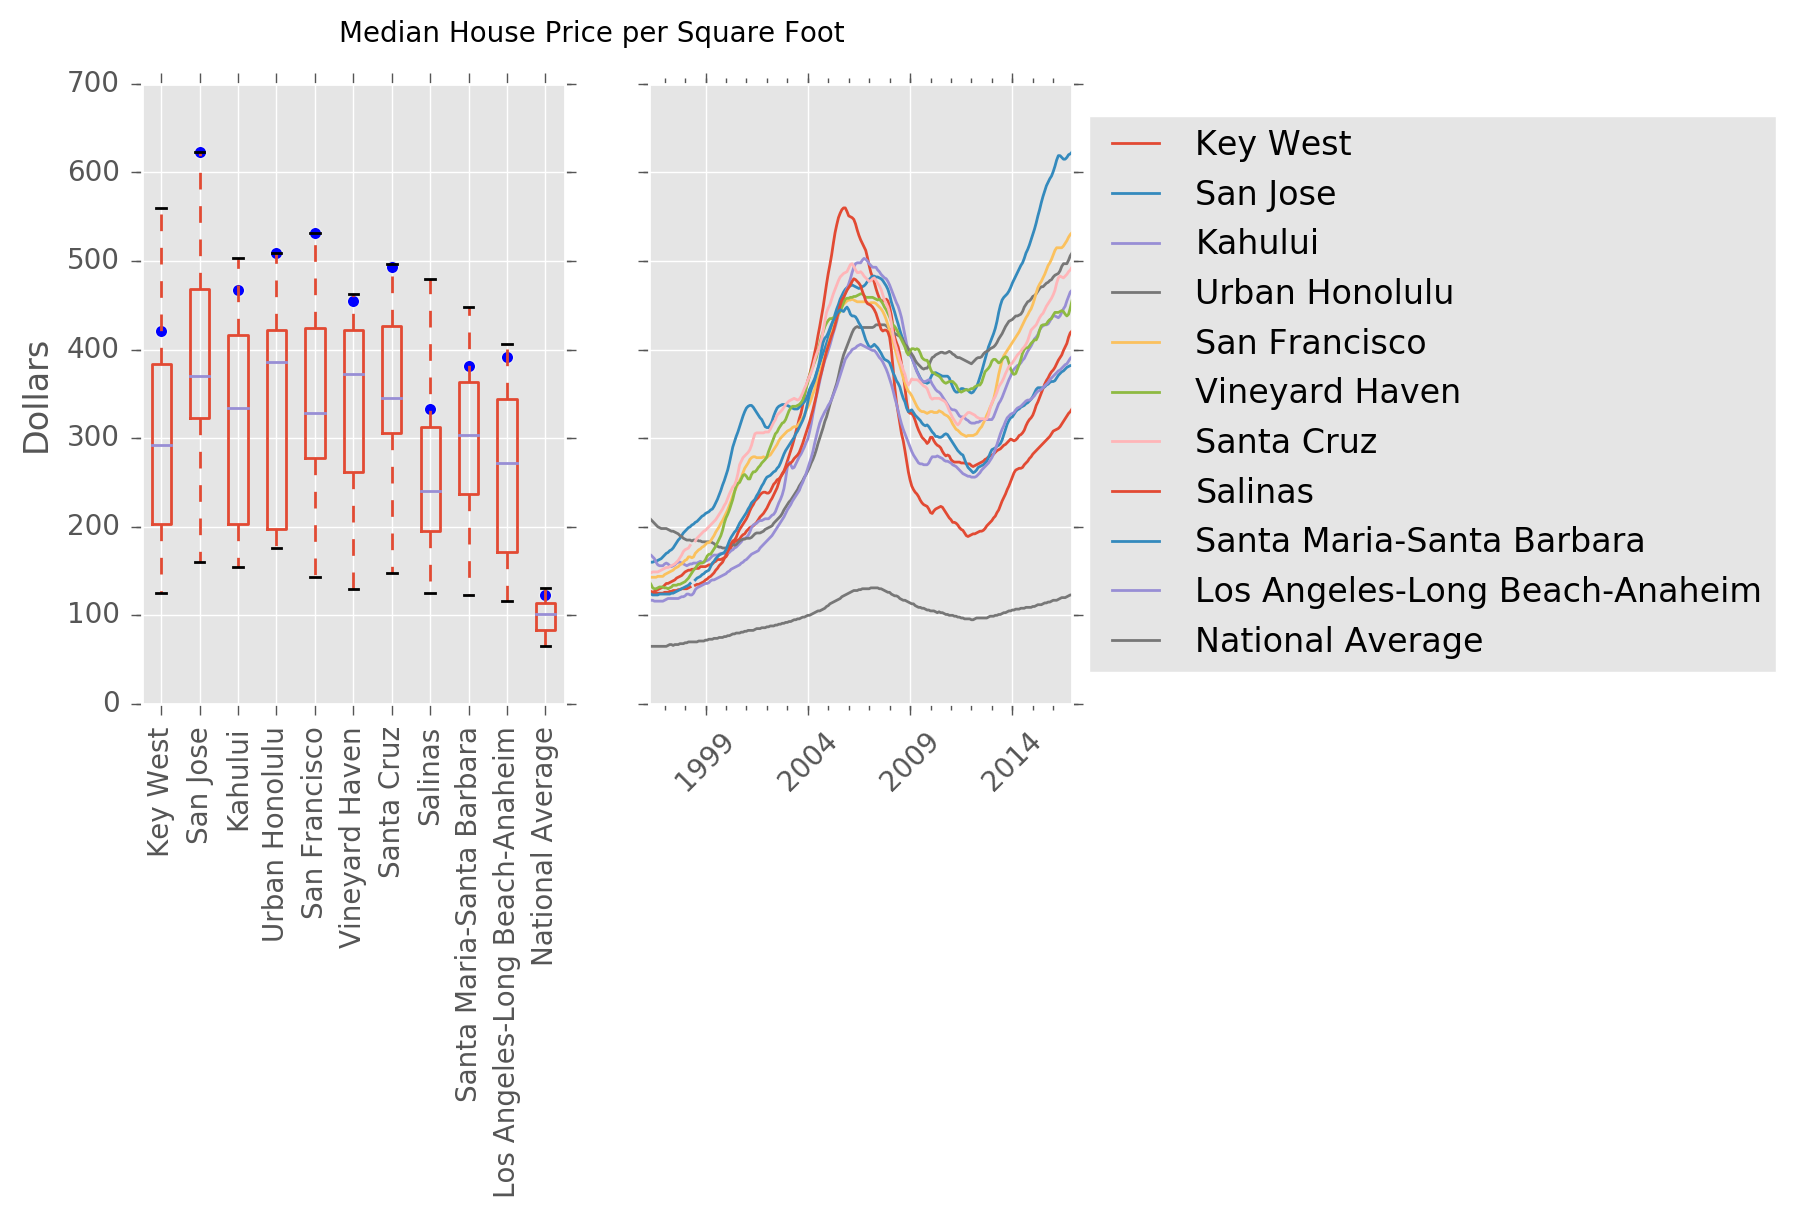

In [8]:
print ' Most Price Variance '.center(70, '+')
p = plot_house_prices(plot_df, most_stdev)

In [9]:
state = 'CA'
by_state = df[df.State == state].index.tolist()

state_means = df.groupby('State').mean()

top_states  = state_means.sort_values(by=max(date_cols),
                          ascending=False).index.tolist()[:10]

low_states  = state_means.sort_values(by=max(date_cols),
                          ascending=True).index.tolist()[:10]

state_means = state_means[date_cols]

state_means.columns = pd.to_datetime(state_means.columns.to_series(), 
                                 format="%Y-%m")

+++++++++++++++++++++++++++ Denver vs Napa +++++++++++++++++++++++++++


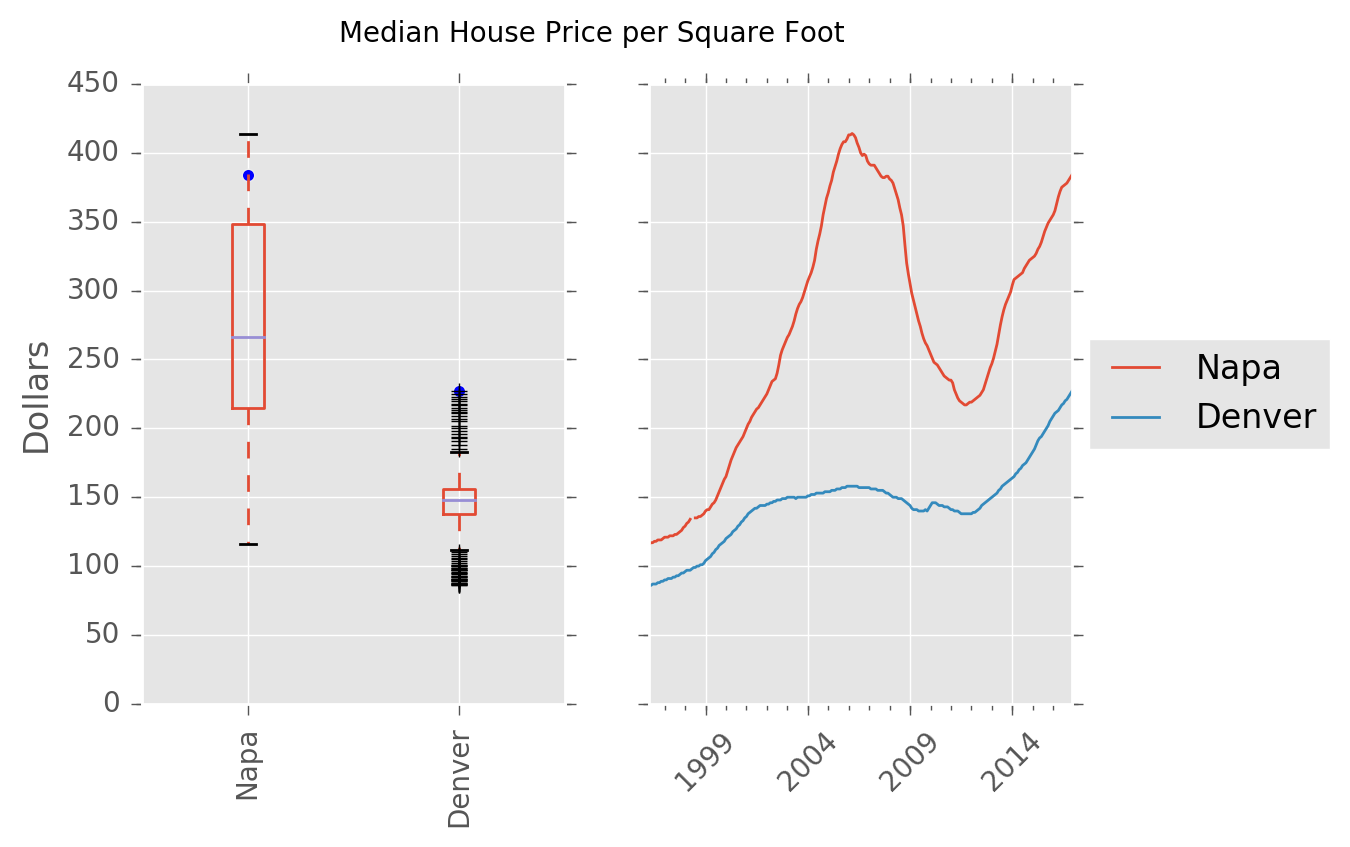

In [10]:
print (' '+'Denver vs Napa'+' ').center(70, '+')
p = plot_house_prices(plot_df, ['Napa', 'Denver'])

++++++++++++++++++++++++++++ Danger Zone +++++++++++++++++++++++++++++


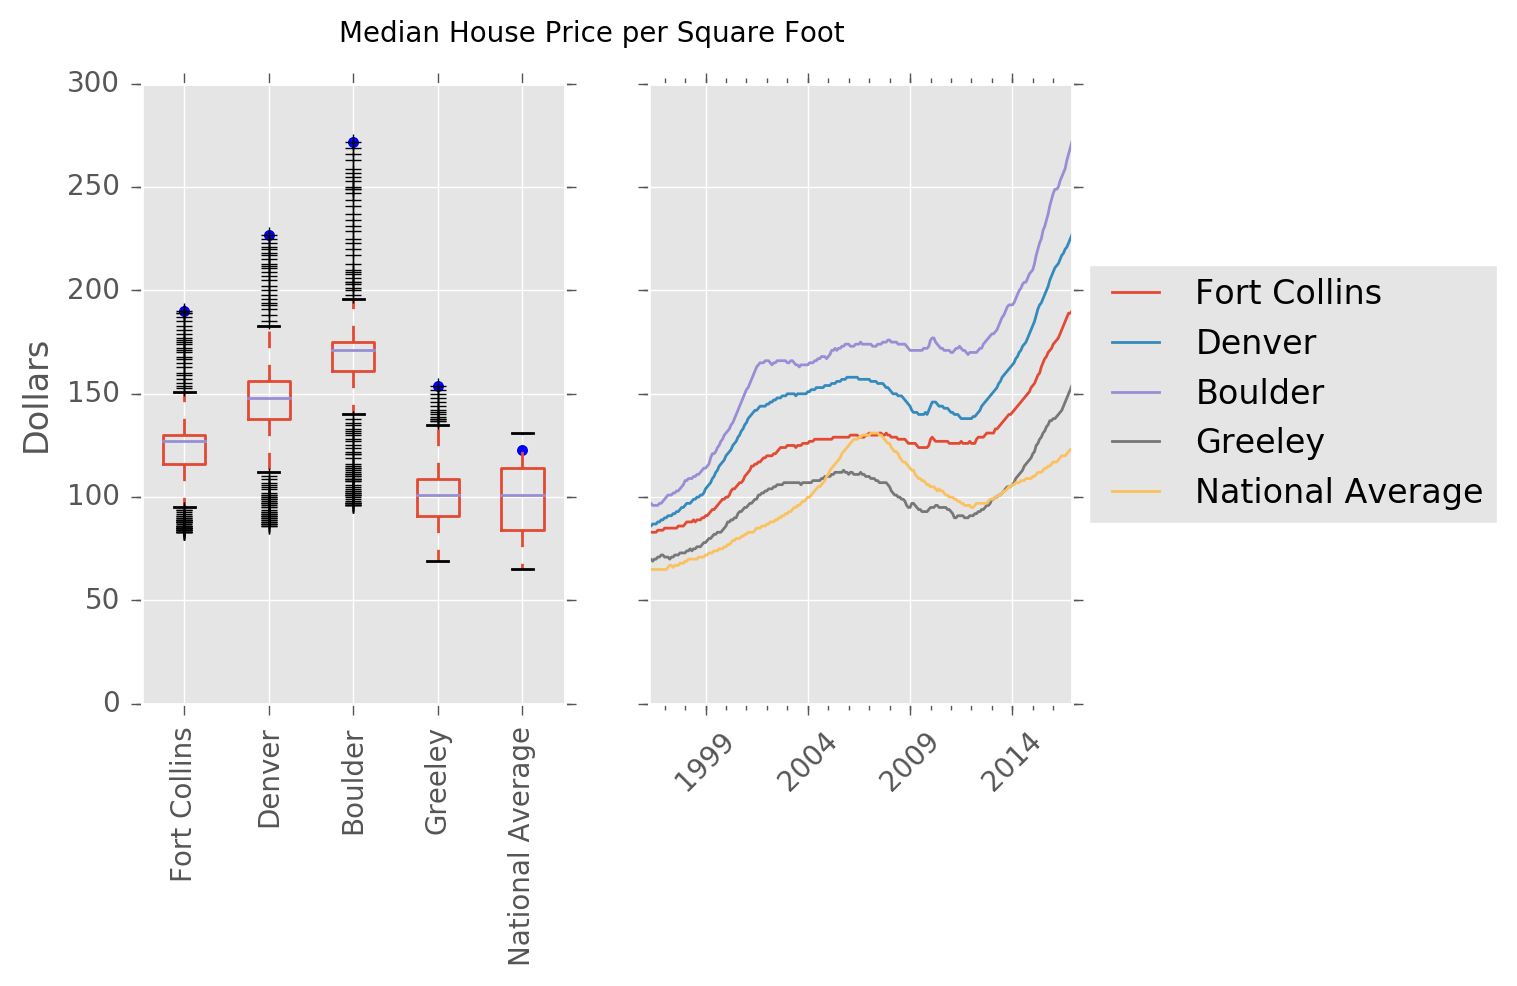

In [11]:
print ' Danger Zone '.center(70, '+')
cities = ['Fort Collins', 'Denver', 'Boulder', 'Greeley', 'National Average']
p = plot_house_prices(plot_df, cities)

++++++++++++++ Current Lowest Ten States in Mean Price +++++++++++++++


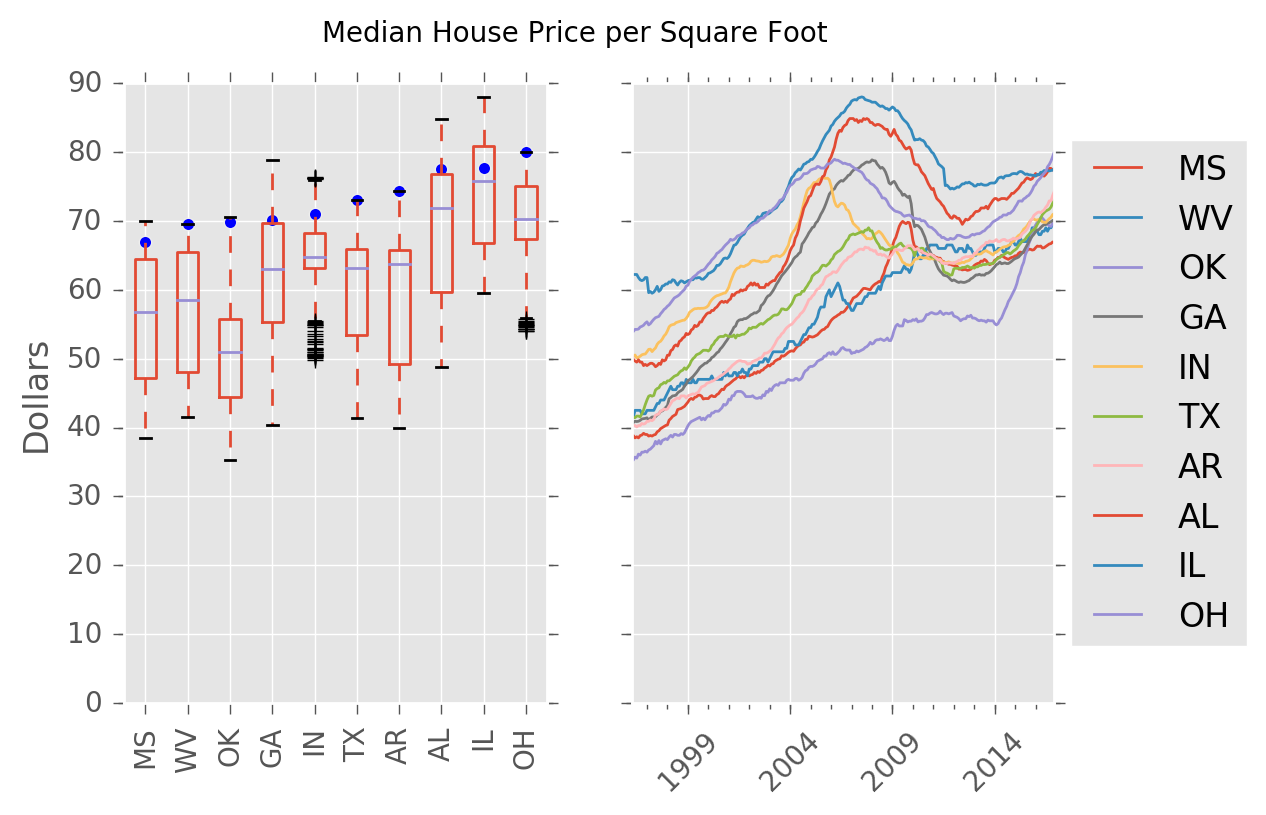

In [12]:
print ' Current Lowest Ten States in Mean Price '.center(70, '+')
p = plot_house_prices(state_means, low_states)

++++++++++++++ Current Highest Ten States in Mean Price ++++++++++++++


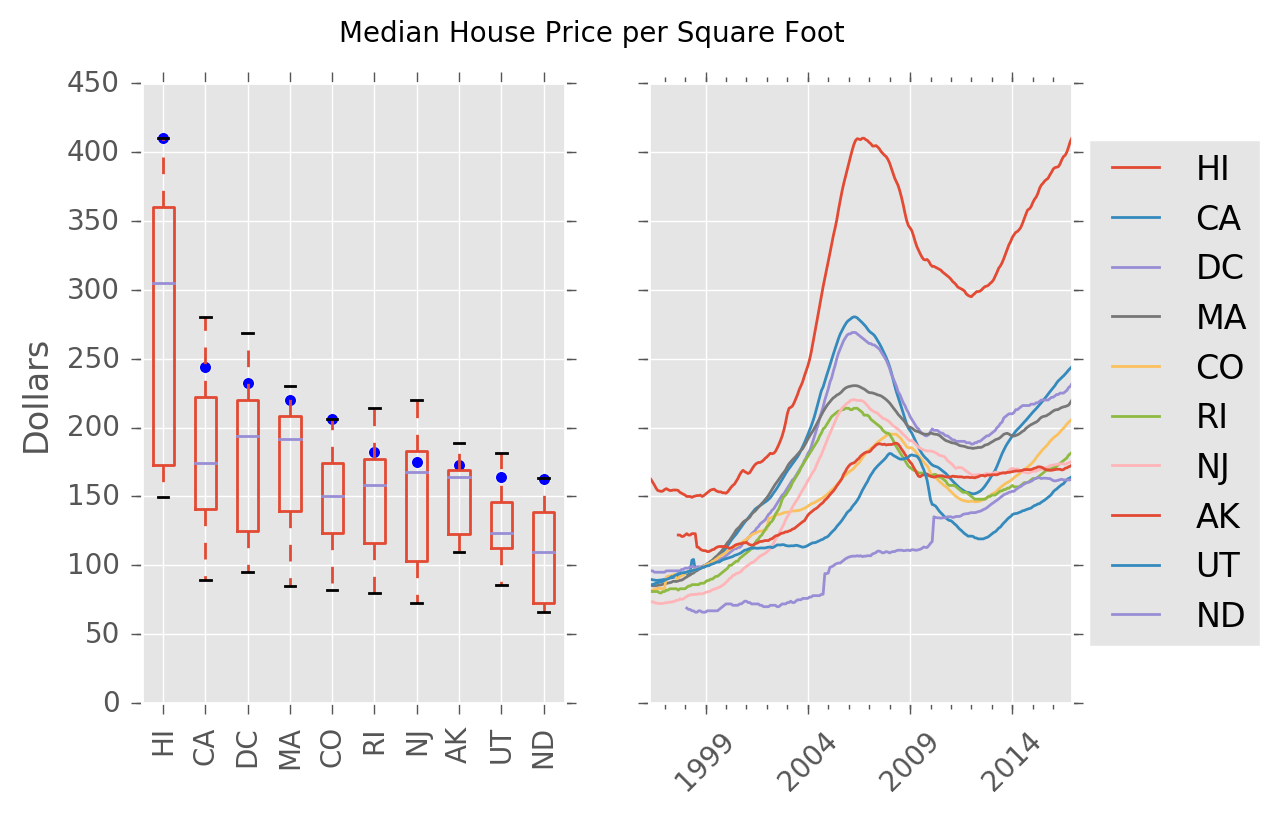

In [13]:
print ' Current Highest Ten States in Mean Price '.center(70, '+')
p = plot_house_prices(state_means, top_states)